In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

### Understanding the Tfidftransformer usage

In [9]:
doc = [
        "A video of government workers in Puducherry hurriedly throwing the body of a COVID-19 positive man into a pit has caused massive outrage, prompting the administration to order a probe into the incident.",
        "The COVID pandemic has hit the world and the Vedanta Group business. It has incurred losses in oil, gas and mining sectors.",
        "Yuvraj Singh was diagnosed with a cancerous tumor in his left lung following India's World Cup triumph in 2011. He had scored 362 runs and claimed 15 wickets in the tournament and was bestowed with the Player of the Tournament award in the end"
]

In [10]:
cv = CountVectorizer()
word_count_vector = cv.fit_transform(doc)

In [11]:
word_count_vector.shape

(3, 68)

In [15]:
feature_names = cv.get_feature_names()

In [14]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tf_idf_vector = tfidf_transformer.fit_transform(word_count_vector)

In [17]:
query = tf_idf_vector[2]
df = pd.DataFrame(query.T.todense(), index=feature_names,columns=['tfidf'])
df.sort_values(by=['tfidf'],ascending=False)

,tfidf
in,0.328778
the,0.328778
with,0.278334
was,0.278334
tournament,0.278334
...,...
order,0.000000
outrage,0.000000
pandemic,0.000000
has,0.000000


In [19]:
word_count_vector.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0],
       [1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 4, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
        1, 1]], dtype=int64)

## Topic Modelling on Practical Dataset

In [21]:
df = pd.read_csv('abcnews-date-text.csv',error_bad_lines=False)

In [22]:
df.head(20)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [23]:
data_text = df[['headline_text']].astype('str')
data_text.shape

(1186018, 1)

In [24]:
data_text = data_text.loc[1:100000,:]

In [25]:
data_text.shape

(100000, 1)

In [26]:
stopw = stopwords.words('english')
stopw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
def stopwords_remove(x):
    terms = x.split()
    terms = [w for w in terms if w not in stopw]
    sentence = ' '.join(terms)
    return sentence

In [28]:
data_text['Refined_headlines'] = data_text['headline_text'].apply(lambda x: stopwords_remove(x))

In [29]:
data_text.head()

,headline_text,Refined_headlines
1,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation
2,a g calls for infrastructure protection summit,g calls infrastructure protection summit
3,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,air nz strike to affect australian travellers,air nz strike affect australian travellers
5,ambitious olsson wins triple jump,ambitious olsson wins triple jump


In [30]:
def word_count(x):
    terms = x.split()
    return len(terms)
data_text['word_count']=data_text['Refined_headlines'].apply(lambda x: word_count(x))

In [31]:
data_text.head()

,headline_text,Refined_headlines,word_count
1,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation,6
2,a g calls for infrastructure protection summit,g calls infrastructure protection summit,5
3,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise,7
4,air nz strike to affect australian travellers,air nz strike affect australian travellers,6
5,ambitious olsson wins triple jump,ambitious olsson wins triple jump,5


In [32]:
data_text['word_count'].describe()

count    100000.000000
mean          5.252910
std           1.036744
min           1.000000
25%           5.000000
50%           5.000000
75%           6.000000
max          10.000000
Name: word_count, dtype: float64

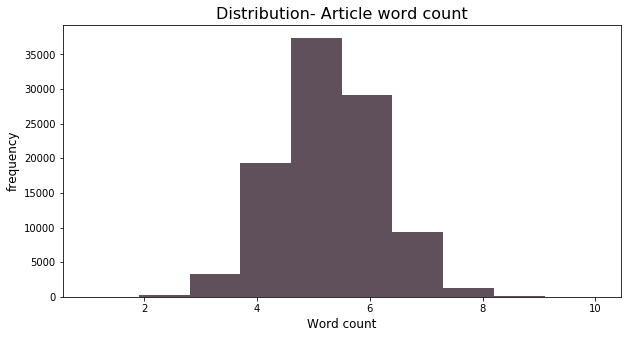

In [36]:
fig = plt.figure(figsize=(10,5))

plt.hist(
        data_text['word_count'],
        bins=10,
        color='#60505C'
)

plt.title("Distribution- Article word count",fontsize=16)
plt.ylabel("frequency",fontsize=12)
plt.xlabel("Word count",fontsize=12)

plt.show()

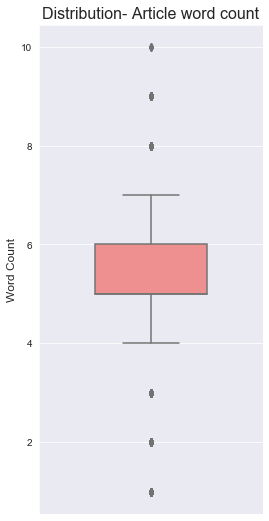

In [39]:
import seaborn as sns
sns.set_style('darkgrid')

fig = plt.figure(figsize=(4,9))

sns.boxplot(
        data_text['word_count'],
        orient='v',
        width=0.5,
        color='#ff8080'
)

plt.ylabel("Word Count",fontsize=12)
plt.title("Distribution- Article word count",fontsize=16)

plt.show()

In [40]:
headline_sentences = [''.join(text) for text in data_text['Refined_headlines']]

In [41]:
vectorizer = CountVectorizer(analyzer='word',max_features=5000)
x_counts = vectorizer.fit_transform(headline_sentences)

In [46]:
x_counts.toarray().shape

(100000, 5000)

In [48]:
transformer = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer.fit_transform(x_counts)

In [49]:
x_tfidf

<100000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 449845 stored elements in Compressed Sparse Row format>

In [62]:
num_topics = 5
model = NMF(n_components = num_topics, init='nndsvd')
model.fit(x_tfidf)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [63]:
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {}
    for i in range(num_topics):
        
        words_ids = model.components_[i].argsort()[:-n_top_words-1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic #'+'{:02d}'.format(i+1)] = words
        
    return pd.DataFrame(word_dict)

In [64]:
get_nmf_topics(model,10)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,police,us,govt,man,new
1,probe,iraq,council,court,zealand
2,investigate,killed,plan,charged,laws
3,missing,troops,urged,murder,set
4,search,iraqi,nsw,face,chief
5,death,war,wa,dies,centre
6,crash,soldiers,vic,charges,year
7,fatal,soldier,water,car,president
8,car,baghdad,boost,crash,deal
9,shooting,says,qld,charge,world


In [60]:
model.components_[0][0]

0.009877887335529828